In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

import statsmodels.formula.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('House_Prices.csv')

data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
data.Bedrooms.value_counts()

3    67
2    30
4    29
5     2
Name: Bedrooms, dtype: int64

In [5]:
data.Bathrooms.value_counts()

2    72
3    55
4     1
Name: Bathrooms, dtype: int64

In [6]:
data.Offers.value_counts()

3    46
2    36
1    23
4    19
5     3
6     1
Name: Offers, dtype: int64

In [7]:
data.Brick.value_counts()

No     86
Yes    42
Name: Brick, dtype: int64

In [8]:
data.Neighborhood.value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [25]:
'''
Observations:
0. No South Neighborhood data. Which might indicate that South is commercial or we just might not have the data lol.
1. There are no single bedroom and single bath, which might indicate the houses being in good neighborhood.
'''

'\nObservations:\n0. No South Neighborhood data. Which might indicate that South is commercial or we just might not have the data lol.\n1. There are no single bedroom and single bath, which might indicate the houses being in good neighborhood.\n'

In [11]:
data_wood = data[(data.Brick == 'No')]
data_brick = data[(data.Brick == 'Yes')]

In [13]:
data_wood.Price.mean()

121958.13953488372

In [14]:
data_brick.Price.mean()

147769.04761904763

In [15]:
data_wood.SqFt.mean()

1989.1860465116279

In [16]:
data_brick.SqFt.mean()

2025.0

In [17]:
data_wood.Neighborhood.value_counts()

North    37
East     26
West     23
Name: Neighborhood, dtype: int64

In [18]:
data_brick.Neighborhood.value_counts()

East     19
West     16
North     7
Name: Neighborhood, dtype: int64

In [20]:
data_wood.Bedrooms.mean()

3.0

In [21]:
data_brick.Bedrooms.mean()

3.0714285714285716

In [22]:
data_wood.Bathrooms.mean()

2.383720930232558

In [23]:
data_brick.Bathrooms.mean()

2.5714285714285716

In [26]:
'''
Observations:
2. Brick houses are comparatively higher priced (by around 200k).
3. Brich houses have around 40 sqft more area though.
4. Altough the number of bedrooms of brick and wood houses are nearly same.
5. Wood houses are spread in all neighborhoods (dominating in North Neighborhood), but there seems a small community or some type of collective group of brick houses in the East Neighborhood.
'''

'\nObservations:\n2. Brick houses are comparatively higher priced (by around 200k).\n3. Brich houses have around 40 sqft more area though.\n4. Altough the number of bedrooms of brick and wood houses are nearly same.\n5. Wood houses are spread in all neighborhoods (dominating in North Neighborhood), but there seems a small community or some type of collective group of brick houses in the East Neighborhood.\n'

In [27]:
report = pandas_profiling.ProfileReport(data)
report.to_file('profile_report_for_houses.html')

In [28]:
# Will drop Home as it's unique

In [29]:
data.drop('Home', axis=1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


In [32]:
data2 = data

In [37]:
data2 = pd.get_dummies(data, columns = ['Brick', 'Neighborhood'], drop_first=True)

In [38]:
data2

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,0,0,0
1,114200,2030,4,2,3,0,0,0
2,114800,1740,3,2,1,0,0,0
3,94700,1980,3,2,3,0,0,0
4,119800,2130,3,3,3,0,0,0
...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,1,0,0
124,147900,2160,4,3,3,1,0,0
125,113500,2070,2,2,2,0,1,0
126,149900,2020,3,3,1,0,0,1


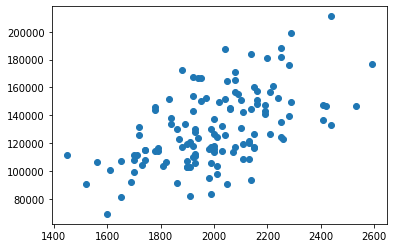

In [40]:
plt.scatter(x = data2.SqFt, y = data2.Price)

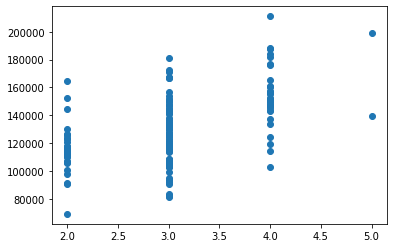

In [41]:
plt.scatter(x = data2.Bedrooms, y = data2.Price)

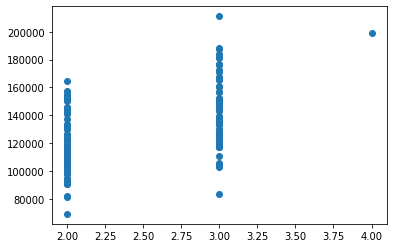

In [42]:
plt.scatter(x = data2.Bathrooms, y = data2.Price)

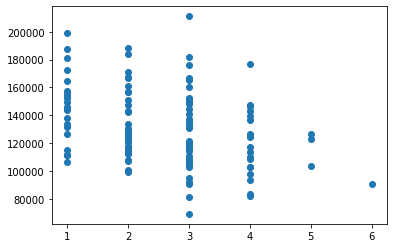

In [43]:
plt.scatter(x = data2.Offers, y = data2.Price)

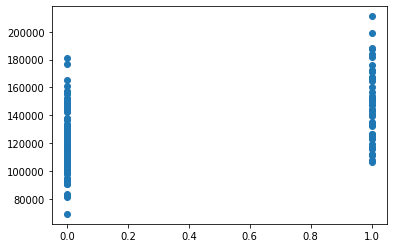

In [44]:
plt.scatter(x = data2.Brick_Yes, y = data2.Price)

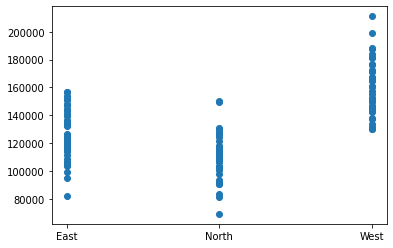

In [45]:
plt.scatter(x = data.Neighborhood, y = data.Price)

In [46]:
'''
Observations:
6. West Neighborhood is expensive. Rich nibbas.
'''

'\nObservations:\n6. West Neighborhood is expensive. Rich nibbas.\n'

In [47]:
#I do not see any missings, hence doing outlier

#Outlier treatment
def outlier_treat(x):
    if ((x.dtype == 'int') |  (x.dtype == 'float')):
        x =  x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else: 
        x
    return x

In [48]:
data = data2

In [49]:
data = data.apply(lambda x: outlier_treat(x))

c:\users\suhet\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

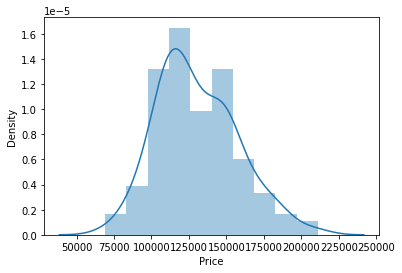

In [50]:
#1. Normality
sns.distplot(data.Price)

In [52]:
#I think it's normal, no need to transform

In [53]:
corr = data.corr()['Price']
corr.to_csv('corr1.csv')

In [54]:
list_var_corr=[
'Neighborhood_West',
'SqFt',
'Neighborhood_North',
'Bedrooms',
'Bathrooms',
'Brick_Yes',
'Offers'
]

In [55]:
data

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,0,0,0
1,114200,2030,4,2,3,0,0,0
2,114800,1740,3,2,1,0,0,0
3,94700,1980,3,2,3,0,0,0
4,119800,2130,3,3,3,0,0,0
...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,1,0,0
124,147900,2160,4,3,3,1,0,0
125,113500,2070,2,2,2,0,1,0
126,149900,2020,3,3,1,0,0,1


In [56]:
features = data[data.columns.difference(['Price'])]
target = data['Price']

In [57]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression( features, target )

In [58]:
f_reg_results = pd.concat([pd.Series(features.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)
f_reg_results.columns = ['features', 'f_value', 'p_value']

In [59]:
f_reg_results.sort_values(by='f_value', ascending=False, inplace=True)

In [60]:
f_reg_results

,features,f_value,p_value
4,Neighborhood_West,131.040792,3.070448e-21
6,SqFt,55.501108,1.302383e-11
3,Neighborhood_North,54.140599,2.109500e-11
1,Bedrooms,48.177066,1.829846e-10
0,Bathrooms,47.505606,2.345250e-10
2,Brick_Yes,32.499147,8.022757e-08
5,Offers,13.746510,3.121816e-04


In [61]:
f_reg_features = f_reg_results[f_reg_results.p_value<0.05]
f_reg_features

,features,f_value,p_value
4,Neighborhood_West,131.040792,3.070448e-21
6,SqFt,55.501108,1.302383e-11
3,Neighborhood_North,54.140599,2.109500e-11
1,Bedrooms,48.177066,1.829846e-10
0,Bathrooms,47.505606,2.345250e-10
2,Brick_Yes,32.499147,8.022757e-08
5,Offers,13.746510,3.121816e-04


In [62]:
list_f_reg = list(f_reg_features.features)

In [63]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=5)
rfe = rfe.fit(features, target)

In [65]:
list_rfe = list(features.columns[rfe.get_support()])
list_rfe

['Bathrooms', 'Brick_Yes', 'Neighborhood_West', 'Offers', 'SqFt']

In [66]:
consider = list(set(list_var_corr+list_f_reg + list_rfe))

In [68]:
consider

['Neighborhood_West',
 'Offers',
 'Neighborhood_North',
 'SqFt',
 'Bedrooms',
 'Bathrooms',
 'Brick_Yes']

In [69]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_new = features[consider]

In [76]:
X = X_new[X_new.columns.difference(['SqFt', 'Bedrooms'])] 

In [77]:
vif_values = pd.concat([pd.Series(X.columns), pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])])], axis=1)

In [78]:
vif_values.columns = ['feature', 'vif']
vif_values.sort_values(by= 'vif', ascending=False)

,feature,vif
0,Bathrooms,10.912916
4,Offers,8.601271
3,Neighborhood_West,2.063224
2,Neighborhood_North,2.047343
1,Brick_Yes,1.622912


In [79]:
list(vif_values.feature)

['Bathrooms', 'Brick_Yes', 'Neighborhood_North', 'Neighborhood_West', 'Offers']

In [80]:
# split the data into train & test

from sklearn.model_selection import train_test_split

In [81]:
data_new = pd.concat([X, target], axis=1)

train, test = train_test_split(data_new, test_size =0.3, random_state = 24)

In [83]:
train.shape

(89, 6)

In [85]:
train.columns

Index(['Bathrooms', 'Brick_Yes', 'Neighborhood_North', 'Neighborhood_West',
       'Offers', 'Price'],
      dtype='object')

In [84]:
test.shape

(39, 6)

In [89]:
formula = 'Price~'+'+'.join(train.columns.difference(['Price', 'Neighborhood_North']))

In [98]:
import statsmodels.formula.api as smf

ols_model = smf.ols(formula, data=train).fit()

In [99]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     61.59
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           3.41e-24
Time:                        12:35:26   Log-Likelihood:                -972.03
No. Observations:                  89   AIC:                             1954.
Df Residuals:                      84   BIC:                             1966.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.106e+04   7841.89

In [104]:
train_price = ols_model.predict(train)
train_y = train.Price

In [105]:
test_price = ols_model.predict(test)
test_y = test.Price

In [106]:
mape_train = np.mean(np.abs(train_y - train_price)/train_y)
mape_train

0.08464523345214514

In [107]:
mape_test = np.mean(np.abs(test_y - test_price)/test_y)
mape_test

0.08776212153635216

In [108]:
#MAPE/RMSE/MSE/RMSPE
#corr(actual, pred)

RMSPE_train = np.sqrt(np.mean(((train_y - train_price)/train_y)**2))
RMSPE_test = np.sqrt(np.mean(((test_y - test_price)/test_y)**2))

In [109]:
RMSPE_train

0.11891186064795765

In [110]:
RMSPE_test

0.10694528834179837

In [111]:
corr_actual_pred_train = np.corrcoef(train_y,train_price)

In [112]:
corr_actual_pred_train

array([[1.        , 0.86355258],
       [0.86355258, 1.        ]])

In [114]:
corr_actual_pred_test = np.corrcoef(test_y,test_price)

In [115]:
corr_actual_pred_test

array([[1.        , 0.86387655],
       [0.86387655, 1.        ]])

In [116]:
#
train_deciles = pd.concat([train_y, train_price], axis=1)

In [117]:
train_deciles.columns = ['actual', 'pred']

In [118]:
train_deciles

,actual,pred
51,91100,104933.417903
22,91700,104933.417903
24,156400,143735.756342
67,151900,121419.299066
96,133300,121419.299066
...,...,...
17,83600,118386.413541
87,172500,177391.597323
64,130300,138589.258883
3,94700,104933.417903


In [123]:
train_deciles['Deciles'] = pd.qcut(train_deciles.pred, 10, labels=False, duplicates='drop')

In [124]:
train_deciles.groupby(['Deciles']).agg(np.mean)

,actual,pred
Deciles,,
0,100928.571429,103344.763580
1,112512.500000,107966.303429
2,122263.636364,120040.714737
3,129080.000000,124216.989653
4,125250.000000,127343.953155
5,141725.000000,137865.420595
6,138862.500000,141426.709105
7,151466.666667,156033.836347
8,177100.000000,175179.514529


In [125]:
#
test_deciles = pd.concat([test_y, test_price], axis=1)

test_deciles.columns = ['actual', 'pred']

test_deciles['Deciles'] = pd.qcut(test_deciles.pred, 10, labels=False)

test_deciles.groupby(['Deciles']).agg(np.mean)

,actual,pred
Deciles,,
0,109540.000000,103720.263693
1,110050.000000,107966.303429
2,111000.000000,110999.188955
3,115175.000000,119902.856304
4,138220.000000,124358.106617
5,117950.000000,127249.875179
6,133725.000000,133447.970014
7,153620.000000,144577.034244
8,169633.333333,159481.073613


<AxesSubplot:>

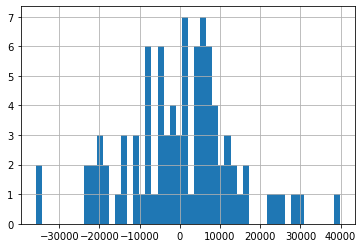

In [129]:
ols_model.resid.hist(bins=50)

In [130]:
np.corrcoef(train.Price, ols_model.resid) 

array([[1.        , 0.50425881],
       [0.50425881, 1.        ]])